In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EXPLORATORY DATA ANALYSIS

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
data.isnull().sum()#no missing value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
cat_var=['sex', 'cp','fbs', 'restecg', 'exng','slp', 'caa', 'thall' ]
continuous_var=['age','chol','trtbps','thalachh','oldpeak',]

## UNIVARIATE ANALYSIS

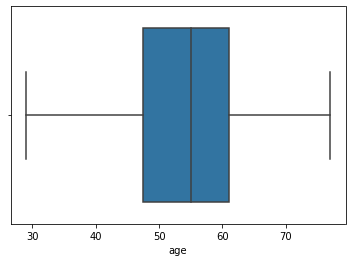

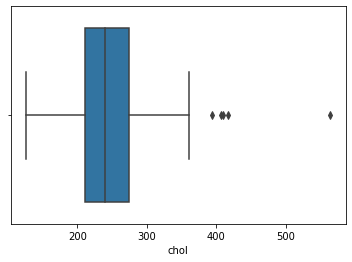

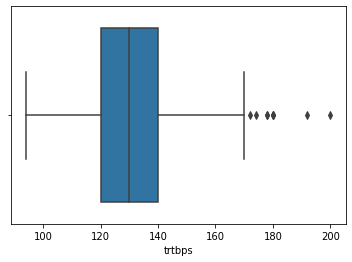

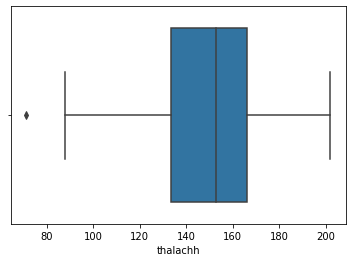

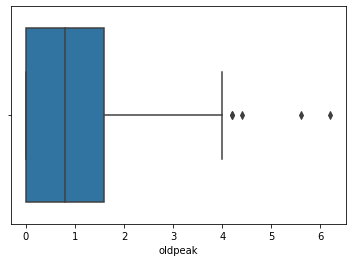

In [8]:
for i in continuous_var:
    ax = sns.boxplot(data[i])
    plt.show()

### as we can see that the data has some outliers but we will not remove it ,because we might loss some important data and it is a medical data

### VISUALISATION

<AxesSubplot:xlabel='output', ylabel='count'>

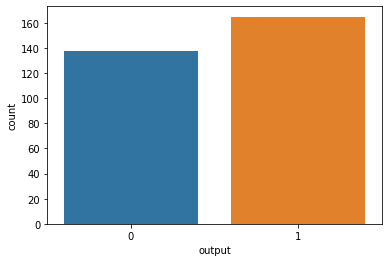

In [9]:
sns.countplot(data=data,x='output')

#### no of more chance ofheart attacked case is higher than less chance of heart attack

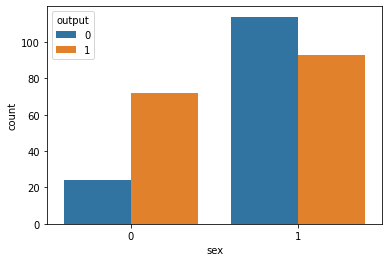

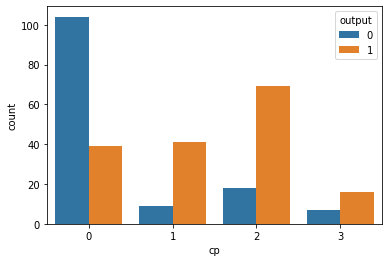

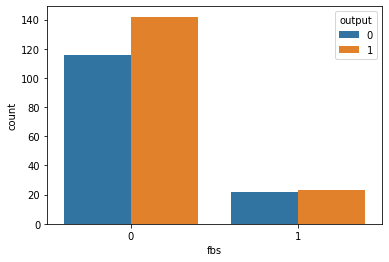

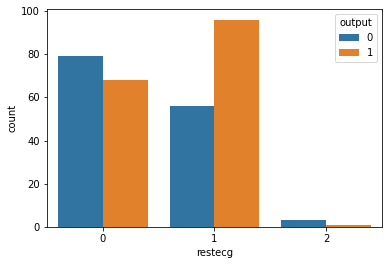

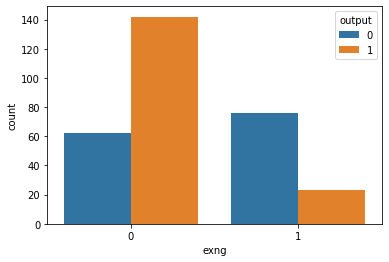

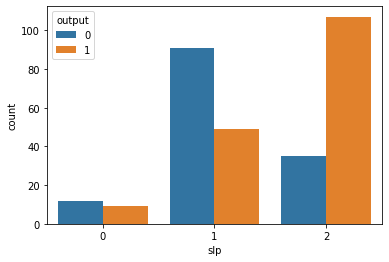

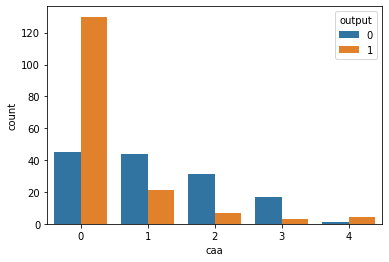

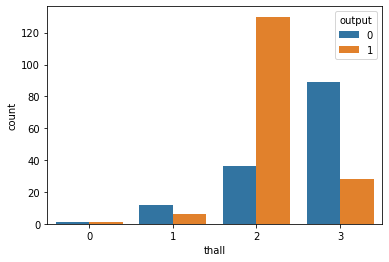

In [10]:

for i in cat_var:
    sns.countplot(data=data,x=data[i],hue='output')
    plt.show()

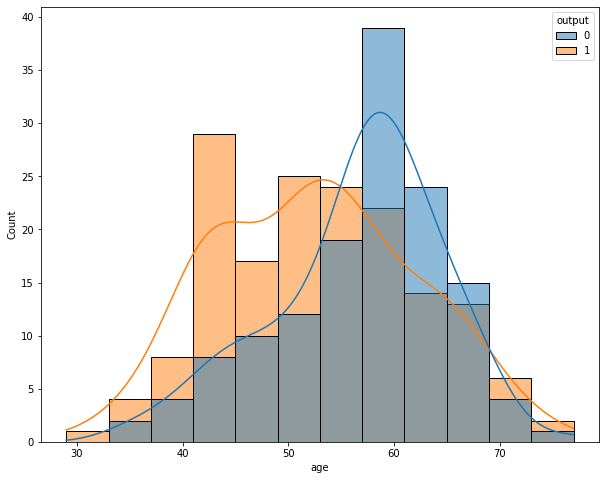

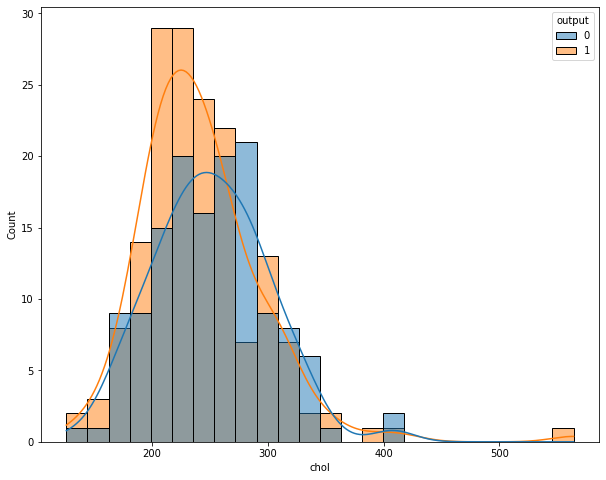

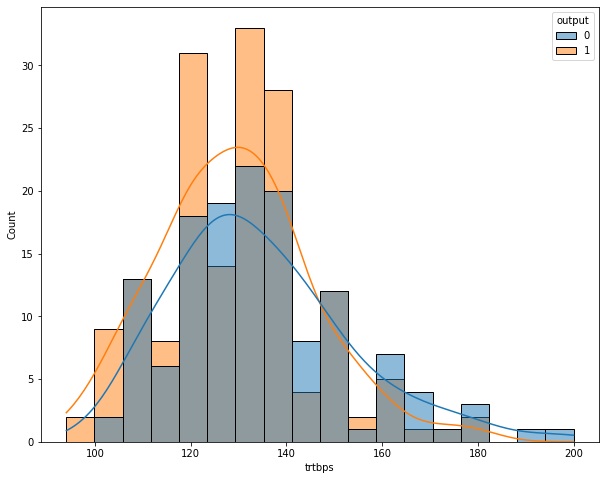

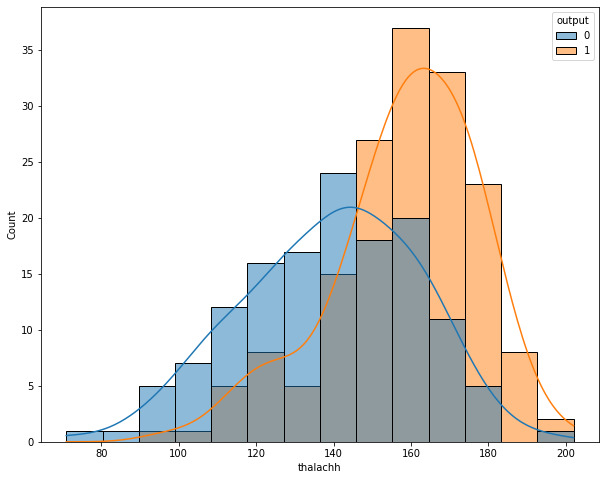

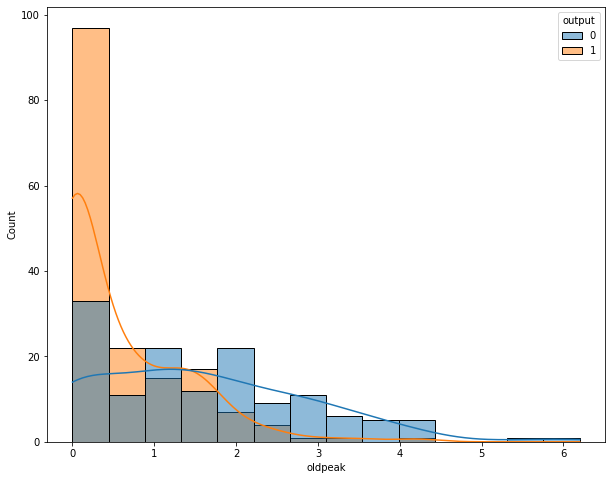

In [11]:
for i in continuous_var:
    plt.figure(figsize=(10,8))
    sns.histplot(data=data,x=data[i],hue='output',kde=True)
    plt.show()
    

In [12]:
#1-person having age 30-50 and 70+ has more chance of getting heart attack
#2-person having cholestrol 200+ has high chance of getting heart attack


<AxesSubplot:>

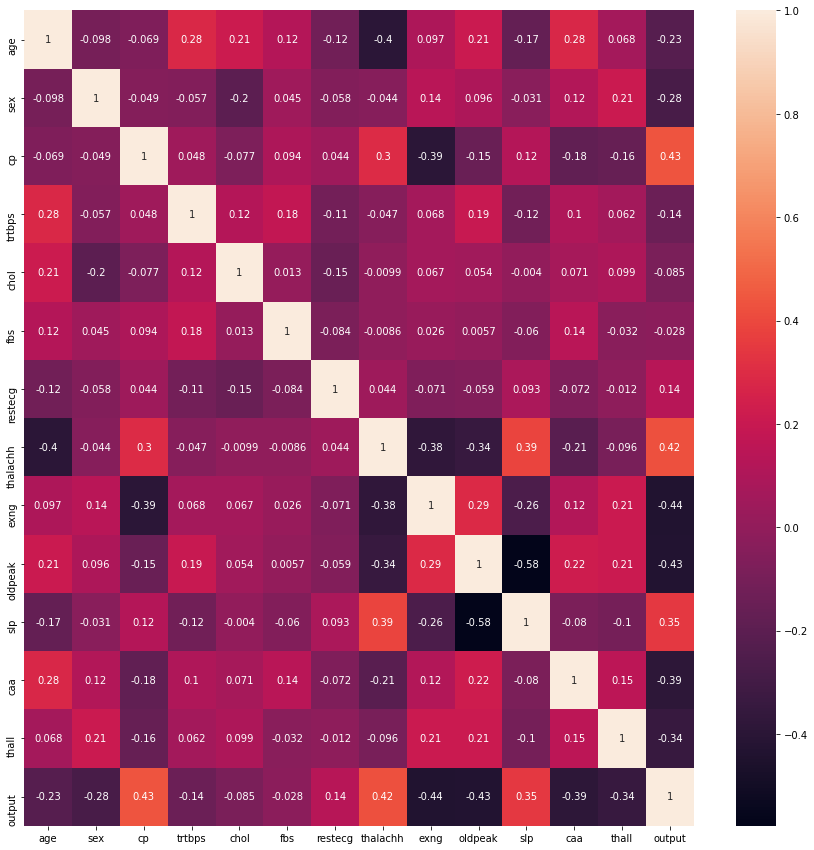

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [14]:
corr_output=data.corr()['output'].sort_values(ascending=False)
corr_output

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<AxesSubplot:>

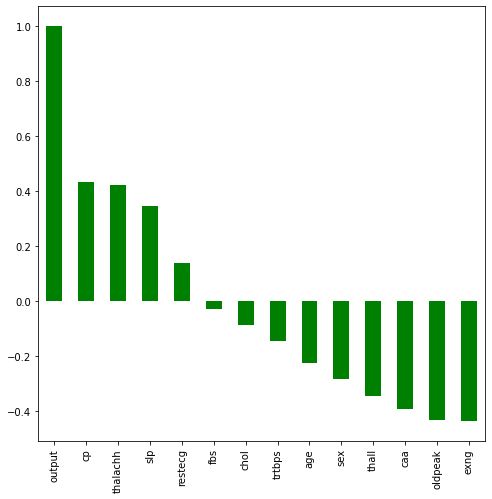

In [15]:
plt.figure(figsize=(8,8))
corr_output.plot(kind='bar',color='green')

### here we can see  how all varaible related to the output(+ correlation,-correlation)

In [16]:
sc=StandardScaler()
scaled_cont=sc.fit_transform(data[continuous_var])
scaled_cont=pd.DataFrame(scaled_cont,columns=continuous_var)
scaled_data=pd.concat([scaled_cont,data[cat_var]],axis=1)

In [17]:
X=scaled_data
Y=data['output']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [19]:
logreg=Pipeline([('logistic',LogisticRegression())])
decision=Pipeline([('dt',DecisionTreeClassifier())])
randomforest=Pipeline([('rf',RandomForestClassifier())])
naivebayes=Pipeline([('nb',GaussianNB())])
knn=Pipeline([('knn',KNeighborsClassifier())])
gbc=Pipeline([('gbc',GradientBoostingClassifier())])
adaboost=Pipeline([('adaboost',AdaBoostClassifier())])
sgdclassifier=Pipeline([('SGDclassifier',SGDClassifier())])
svc=Pipeline([('svc',SVC())])
mlpclass=Pipeline([('mlpc',MLPClassifier())])

In [20]:
mypipeline1=[logreg,decision,randomforest,naivebayes,knn,gbc,adaboost,sgdclassifier,svc,mlpclass]
            

In [21]:
accuracy=0.0
classifier=0
pipeline=""
pipelinedict1={0:'logistic',1:'dt',2:'rf',3:'nb',4:'knn',5:'gbc',6:'adaboost',7:'SGDclassifier',
              8:'svc',9:'mlpc'}

In [22]:
for i in mypipeline1:
    i.fit(x_train,y_train)
model_score=[]
model_name=[]
for i,j in enumerate(mypipeline1):
    print("{} test accuracy: {}".format(pipelinedict1[i],j.score(x_test,y_test)))
    model_name.append(pipelinedict1[i])
    model_score.append(j.score(x_test,y_test))

logistic test accuracy: 0.8131868131868132
dt test accuracy: 0.7142857142857143
rf test accuracy: 0.8351648351648352
nb test accuracy: 0.8021978021978022
knn test accuracy: 0.8351648351648352
gbc test accuracy: 0.8241758241758241
adaboost test accuracy: 0.7582417582417582
SGDclassifier test accuracy: 0.8241758241758241
svc test accuracy: 0.8021978021978022
mlpc test accuracy: 0.8021978021978022


<BarContainer object of 10 artists>

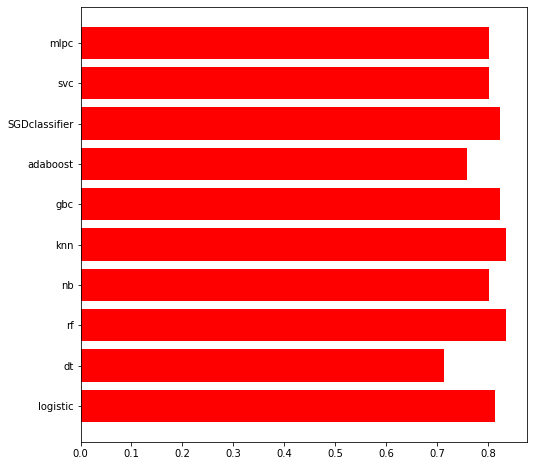

In [23]:
plt.figure(figsize=(8,8))
plt.barh(model_name,model_score,color='red')


### as we can see that KNN has the highest accuracy among all classifier algorithms ,that is 83.51%

## TUNING THE PARAMETER TO GET BETTER ACCURACY

In [24]:
knn=KNeighborsClassifier()

In [25]:
test_score=[]
train_score=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

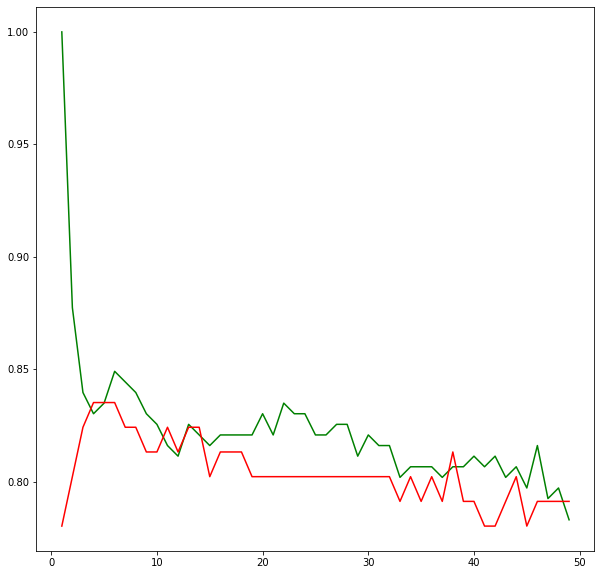

In [26]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50),train_score,color='green')
plt.plot(range(1,50),test_score,color='red')
plt.show()

### at n_neibhour=6,we are getting highest accuracy

In [27]:
knn1=KNeighborsClassifier(n_neighbors=6)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test)

0.8351648351648352

### here we have'nt got any improvement

In [28]:
knn2=KNeighborsClassifier(n_neighbors=6)
rand_state=[]
accuracy=[]
for i in range(1,150,1):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    knn2.fit(x_train,y_train)
    accuracy.append(knn2.score(x_test,y_test))
    rand_state.append(i)
    

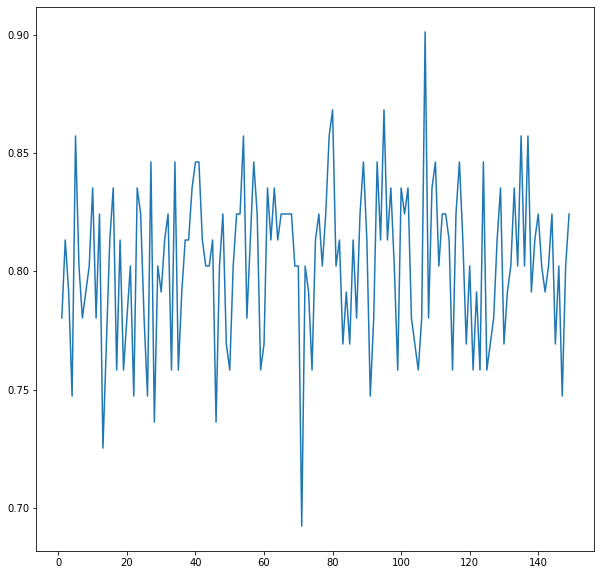

In [29]:
plt.figure(figsize=(10,10))
plt.plot(rand_state,accuracy)

### here random_state in between 100-120 we,are getting highest accuracy

In [30]:
for i in range(len(rand_state)):
    print(accuracy[i],rand_state[i])

0.7802197802197802 1
0.8131868131868132 2
0.7912087912087912 3
0.7472527472527473 4
0.8571428571428571 5
0.8021978021978022 6
0.7802197802197802 7
0.7912087912087912 8
0.8021978021978022 9
0.8351648351648352 10
0.7802197802197802 11
0.8241758241758241 12
0.7252747252747253 13
0.7692307692307693 14
0.8131868131868132 15
0.8351648351648352 16
0.7582417582417582 17
0.8131868131868132 18
0.7582417582417582 19
0.7802197802197802 20
0.8021978021978022 21
0.7472527472527473 22
0.8351648351648352 23
0.8241758241758241 24
0.7802197802197802 25
0.7472527472527473 26
0.8461538461538461 27
0.7362637362637363 28
0.8021978021978022 29
0.7912087912087912 30
0.8131868131868132 31
0.8241758241758241 32
0.7582417582417582 33
0.8461538461538461 34
0.7582417582417582 35
0.7912087912087912 36
0.8131868131868132 37
0.8131868131868132 38
0.8351648351648352 39
0.8461538461538461 40
0.8461538461538461 41
0.8131868131868132 42
0.8021978021978022 43
0.8021978021978022 44
0.8131868131868132 45
0.7362637362637363 

### at i=107(random_state) we are getting accuracy of 90.10%

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=107)
knn2.fit(x_train,y_train)   

KNeighborsClassifier(n_neighbors=6)

In [32]:
knn2.score(x_test,y_test)

0.9010989010989011

In [33]:
y_test_pred=knn2.predict(x_test)


In [34]:
accuracy_score(y_test,y_test_pred)

0.9010989010989011

### here we have got accuracy of our model to be 90.10%

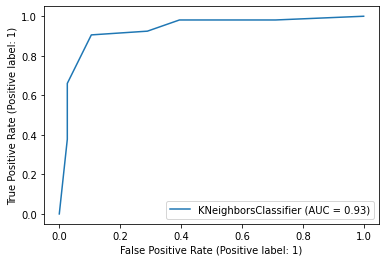

In [35]:

plot_roc_curve(knn2,x_test,y_test)

### here we have got AUC SCORE=.93 which indicate that  model is too good.

In [36]:
roc_auc_score(y_test,y_test_pred)

0.9001986097318768

### ROC AUC SCORE =.90

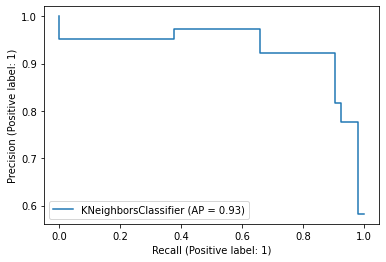

In [37]:
plot_precision_recall_curve(knn2,x_test,y_test)

### AVERAGE PRECISION SCORE IS-- AP=.93

In [38]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.92      0.91      0.91        53

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

